In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

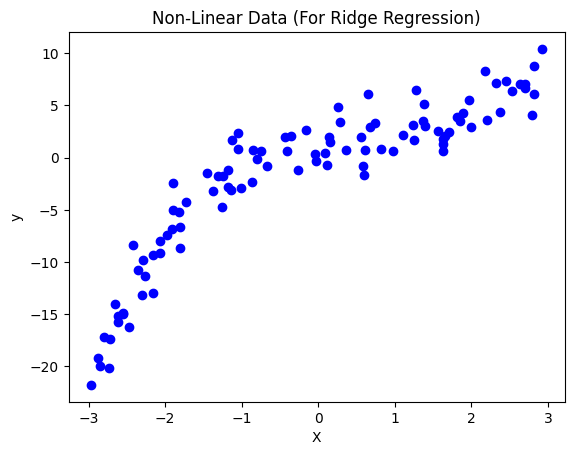

In [2]:
np.random.seed(42)
X=6*np.random.rand(100, 1)-3
y=0.5*X**3-X**2+X+2+np.random.randn(100, 1)*2

plt.scatter(X, y, color='blue')
plt.title("Non-Linear Data (For Ridge Regression)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [3]:
poly=PolynomialFeatures(degree=10, include_bias=False)
X_poly=poly.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [5]:
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)  # Try alpha=0.1, 1, 10 later to see effect

lin_reg.fit(X_train_poly, y_train)
ridge_reg.fit(X_train_poly, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [6]:
y_pred_lin = lin_reg.predict(X_test_poly)
y_pred_ridge = ridge_reg.predict(X_test_poly)

mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Regression MSE:", mse_lin)
print("Ridge Regression MSE:", mse_ridge)
print("Linear Regression R²:", r2_lin)
print("Ridge Regression R²:", r2_ridge)

Linear Regression MSE: 4.187940619674146
Ridge Regression MSE: 3.9794948479462477
Linear Regression R²: 0.9403020328355236
Ridge Regression R²: 0.9432733712489021


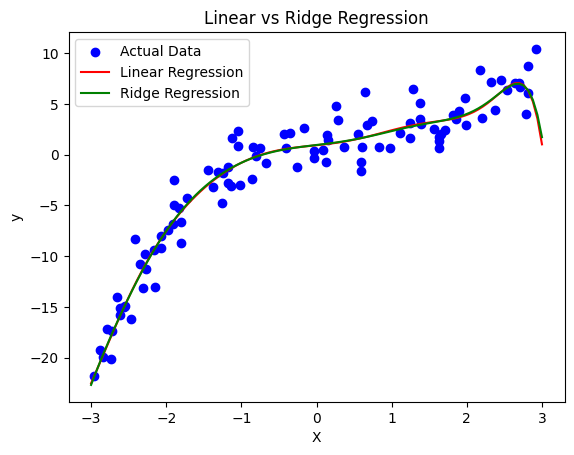

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
X_plot_poly = poly.transform(X_plot)

y_plot_lin = lin_reg.predict(X_plot_poly)
y_plot_ridge = ridge_reg.predict(X_plot_poly)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_plot, y_plot_lin, color='red', label='Linear Regression')
plt.plot(X_plot, y_plot_ridge, color='green', label='Ridge Regression')
plt.title("Linear vs Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()